In [1]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from collections import Counter
from datetime import datetime, timedelta
import statsmodels.api as sm
from sklearn import metrics

In [ ]:
#Display more columns
pd.options.display.max_columns = 50

# 1. Data Preprocessering

In [2]:
features = pd.read_csv('BigDataSchool_features.csv') # Uploading customers data (or features)

In [3]:
features.isnull().sum().sort_values(ascending=False) # Counting Missing Values for each feature
# We can see, that F23, F33 and F34 have too much missing values

F23                     103170
F33                      70136
F34                      70055
F43                      24304
F44                      24285
F45                      24282
F46                      21467
F47                      21355
F40                      20305
F39                      20238
F42                      20183
F41                      20164
F35                      17570
F36                      17441
F37                      15171
F38                      15133
F28                       5383
F7                        5304
F12                       5242
F20                       5231
F4                        5206
F10                       5205
F16                       5204
F13                       5196
F17                       5183
F15                       5165
F31                       5158
F27                       5157
F5                        5155
F32                       5150
F2                        5148
F9                        5143
F11     

In [85]:
features[features['ID'] == 2] # Show and analisis the data on a random client

,ID,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
0,2,1,4.0,133.0,28.0,NaN,0.0,NaN,518.98,2.60,151.33,142.32,9.02,168.0,155.0,6.0,84.0,71.0,13.0,NaN,0.0,56.48,377.331409,0.0,NaN,0.0,0.0,0.0,0.0,19.0,0.0,0.0,1.0,1.0,40.0,99.0,75.0,5.0,89.0,137.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,958.0
1,2,2,NaN,132.0,29.0,24.0,0.0,578.35,574.98,2.80,368.30,359.80,8.50,156.0,146.0,3.0,152.0,139.0,13.0,40.0,0.0,49.50,223.663565,0.0,NaN,0.0,0.0,NaN,7.0,16.0,0.0,0.0,2.0,1.0,40.0,165.0,167.0,4.0,141.0,93.0,NaN,2.0,3.0,1.0,0.0,0.0,2.0,936.0
2,2,3,NaN,131.0,NaN,29.0,0.0,430.13,426.32,0.93,233.93,232.48,1.45,146.0,135.0,2.0,94.0,90.0,4.0,40.0,8.0,49.70,93.089370,0.0,NaN,0.0,0.0,3.0,3.0,31.0,0.0,0.0,3.0,1.0,40.0,100.0,138.0,2.0,128.0,114.0,1.0,3.0,3.0,1.0,0.0,0.0,1.0,919.0
3,2,4,4.0,130.0,31.0,7.0,NaN,479.33,477.13,0.00,296.48,295.63,0.85,173.0,144.0,0.0,81.0,80.0,1.0,0.0,0.0,0.00,72.200725,0.0,NaN,0.0,0.0,31.0,31.0,31.0,0.0,0.0,4.0,1.0,40.0,87.0,167.0,1.0,3.0,137.0,0.0,3.0,3.0,1.0,0.0,0.0,3.0,618.0
4,2,5,8.0,129.0,26.0,2.0,0.0,358.12,339.03,15.28,170.78,168.98,1.80,136.0,104.0,NaN,73.0,68.0,5.0,0.0,0.0,11.89,170.865332,0.0,NaN,0.0,0.0,5.0,5.0,8.0,0.0,0.0,5.0,1.0,40.0,81.0,94.0,1.0,2.0,NaN,0.0,4.0,4.0,2.0,NaN,0.0,2.0,NaN
5,2,6,8.0,128.0,25.0,3.0,0.0,52.33,43.70,7.27,499.52,493.62,5.90,NaN,81.0,7.0,176.0,169.0,7.0,40.0,8.0,48.00,293.366206,0.0,NaN,0.0,0.0,29.0,29.0,29.0,0.0,0.0,6.0,1.0,40.0,NaN,NaN,1.0,5.0,65.0,2.0,5.0,5.0,2.0,0.0,0.0,2.0,682.0


In [151]:
features.drop(['F23', 'F33',  'F34'], axis = 1, inplace = True) # Dropping columns with missing values

In [5]:
Counter(features['F5'].dropna()) # Intresting categorical value, maybe probability of some process

Counter({0.0: 94334, 1.0: 3681})

In [6]:
id_client = features['ID'].unique() # Nums of clients ID

In [63]:
len(id_client)# Sum of clients ID

17195

In [ ]:
cols = features.columns # Names of columns

In [119]:
modef = pd.DataFrame(features.groupby(features['ID'])[cols[0]].apply(lambda x: x.mode()[0])) # Trying find mode of categorical 
# variable "F1" for each client to fill the missing data

In [100]:
cols

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32',
       'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42',
       'F43', 'F44', 'F45', 'F46', 'F47'],
      dtype='object')

In [146]:
cat_mean = features[['ID','F6','F7','F8','F9','F10','F11','F20','F21',
       'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42',
       'F43', 'F44', 'F45', 'F46', 'F47']].groupby(features['ID']).mean() # Create array with mean of noncategorical variables in
# data for each client

In [152]:
#Create arrays with mode of categorical variables in data for each client
cat_mean1 = features[['ID','F1', 'F2', 'F3', 'F4', 'F5', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F22']] # 

In [153]:
cat_mean2 = features[['ID','F24', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32']]

In [156]:
for i in range(len(cat_mean1.columns)):
    modef[cat_mean1.columns[i]] = cat_mean1.groupby(features['ID'])[cat_mean1.columns[i]].apply(lambda x: x.mode()[0])

In [158]:
for i in range(len(cat_mean2.columns)):
    modef[cat_mean2.columns[i]] = cat_mean2.groupby(features['ID'])[cat_mean2.columns[i]].apply(lambda x: x.mode()[0])

In [161]:
cat_mean.fillna(0, inplace = True) #Just in case change the remaining empty values to 0

In [162]:
modef.fillna(0, inplace = True)

In [164]:
modef = pd.concat([cat_mean, modef], axis=1)

In [170]:
modef.drop(['ID'], axis = 1, inplace = True)

In [172]:
modef.columns = ['fil' + i for i in modef.columns]

In [175]:
modef.reset_index(inplace = True)

In [185]:
modef.columns  
# Created a list of features that will replace empty cells for categorical data with a mode,  for numeric - with the average values
# for each client

Index(['ID', 'filF6', 'filF7', 'filF8', 'filF9', 'filF10', 'filF11', 'filF20',
       'filF21', 'filF35', 'filF36', 'filF37', 'filF38', 'filF39', 'filF40',
       'filF41', 'filF42', 'filF43', 'filF44', 'filF45', 'filF46', 'filF47',
       'filF1', 'filF2', 'filF3', 'filF4', 'filF5', 'filF12', 'filF13',
       'filF14', 'filF15', 'filF16', 'filF17', 'filF18', 'filF19', 'filF22',
       'filF24', 'filF26', 'filF27', 'filF28', 'filF29', 'filF30', 'filF31',
       'filF32'],
      dtype='object')

In [191]:
fcols = cols[2:]
fcols  # List of feature names

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F24', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F35',
       'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45',
       'F46', 'F47'],
      dtype='object')

In [188]:
features = pd.merge(features, modef, on = ['ID'])  # Adding variables to replace empty values.

In [193]:
for i in range(len(fcols)):
    features[fcols[i]].fillna(features[('fil' + fcols[i])], inplace = True) # Filling empty values

In [196]:
features = features[cols] # Keep only features

In [197]:
features.isnull().sum().sort_values(ascending=False) # Chaking

F47                     0
F20                     0
F18                     0
F17                     0
F16                     0
F15                     0
F14                     0
F13                     0
F12                     0
F11                     0
F10                     0
F9                      0
F8                      0
F7                      0
F6                      0
F5                      0
F4                      0
F3                      0
F2                      0
F1                      0
MONTH_NUM_FROM_EVENT    0
F19                     0
F21                     0
F46                     0
F22                     0
F45                     0
F44                     0
F43                     0
F42                     0
F41                     0
F40                     0
F39                     0
F38                     0
F37                     0
F36                     0
F35                     0
F32                     0
F31                     0
F30         

In [198]:
features # New array 

,ID,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F24,F26,F27,F28,F29,F30,F31,F32,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
0,2,1,4.0,133.0,28.0,2.0,0.0,379.652,518.9800,2.600,151.330,142.320,9.020000,168.0,155.0,6.0,84.0,71.0,13.0,40.00,0.00,56.480,377.331409,0.000000,0.0,0.0,0.0,0.0,19.0,0.0,0.0,1.0,99.000000,75.000000,5.0,89.0,137.0,0.000000,2.00,2.000000,1.0,0.0,0.0,2.000000,958.000000
1,2,2,4.0,132.0,29.0,24.0,0.0,578.350,574.9800,2.800,368.300,359.800,8.500000,156.0,146.0,3.0,152.0,139.0,13.0,40.00,0.00,49.500,223.663565,0.000000,0.0,0.0,0.0,7.0,16.0,0.0,0.0,2.0,165.000000,167.000000,4.0,141.0,93.0,0.600000,2.00,3.000000,1.0,0.0,0.0,2.000000,936.000000
2,2,3,4.0,131.0,25.0,29.0,0.0,430.130,426.3200,0.930,233.930,232.480,1.450000,146.0,135.0,2.0,94.0,90.0,4.0,40.00,8.00,49.700,93.089370,0.000000,0.0,0.0,3.0,3.0,31.0,0.0,0.0,3.0,100.000000,138.000000,2.0,128.0,114.0,1.000000,3.00,3.000000,1.0,0.0,0.0,1.000000,919.000000
3,2,4,4.0,130.0,31.0,7.0,0.0,479.330,477.1300,0.000,296.480,295.630,0.850000,173.0,144.0,0.0,81.0,80.0,1.0,0.00,0.00,0.000,72.200725,0.000000,0.0,0.0,31.0,31.0,31.0,0.0,0.0,4.0,87.000000,167.000000,1.0,3.0,137.0,0.000000,3.00,3.000000,1.0,0.0,0.0,3.000000,618.000000
4,2,5,8.0,129.0,26.0,2.0,0.0,358.120,339.0300,15.280,170.780,168.980,1.800000,136.0,104.0,0.0,73.0,68.0,5.0,0.00,0.00,11.890,170.865332,0.000000,0.0,0.0,5.0,5.0,8.0,0.0,0.0,5.0,81.000000,94.000000,1.0,2.0,109.2,0.000000,4.00,4.000000,2.0,0.0,0.0,2.000000,822.600000
5,2,6,8.0,128.0,25.0,3.0,0.0,52.330,43.7000,7.270,499.520,493.620,5.900000,136.0,81.0,7.0,176.0,169.0,7.0,40.00,8.00,48.000,293.366206,0.000000,0.0,0.0,29.0,29.0,29.0,0.0,0.0,6.0,106.400000,128.200000,1.0,5.0,65.0,2.000000,5.00,5.000000,2.0,0.0,0.0,2.000000,682.000000
6,4,1,5.0,139.0,29.0,7.0,0.0,682.900,676.5300,3.530,591.270,585.220,6.050000,174.0,164.0,4.0,258.0,253.0,5.0,46.50,0.00,49.250,25.455420,13.795844,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,267.000000,72.000000,14.0,65.8,130.0,2.000000,2.00,4.000000,0.0,2.0,0.0,1.000000,866.000000
7,4,2,5.0,138.0,29.0,22.0,0.0,554.980,574.9180,6.370,685.800,666.280,18.970000,168.0,156.0,5.0,365.0,348.0,16.0,46.50,0.00,65.650,328.323425,319.317252,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,378.000000,64.000000,10.0,67.0,140.0,1.000000,1.00,3.000000,0.0,2.0,0.0,1.000000,2830.000000
8,4,3,5.0,137.0,30.0,28.0,0.0,703.550,694.6200,8.200,803.100,802.700,0.400000,202.0,138.0,3.0,311.0,307.0,4.0,45.00,0.00,65.500,552.226004,536.782703,0.0,0.0,1.0,3.0,6.0,0.0,0.0,3.0,321.000000,93.000000,10.2,66.0,140.0,1.000000,1.00,3.000000,0.0,2.0,0.0,2.000000,5668.000000
9,4,4,5.0,136.0,29.0,25.0,0.0,586.320,582.1300,3.200,681.570,618.680,62.880000,191.0,178.0,3.0,347.0,318.0,29.0,46.50,0.00,63.290,189.807802,179.772284,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,365.000000,72.000000,8.0,59.0,140.0,2.000000,2.00,4.000000,0.0,2.0,0.0,1.000000,9681.000000


In [201]:
mon = features['MONTH_NUM_FROM_EVENT'].unique() # Num of months

In [213]:
mon1 = features[features['MONTH_NUM_FROM_EVENT'] == 1] # Separating data for each month
mon2 = features[features['MONTH_NUM_FROM_EVENT'] == 2]
mon3 = features[features['MONTH_NUM_FROM_EVENT'] == 3]
mon4 = features[features['MONTH_NUM_FROM_EVENT'] == 4]
mon5 = features[features['MONTH_NUM_FROM_EVENT'] == 5]
mon6 = features[features['MONTH_NUM_FROM_EVENT'] == 6]

In [214]:
mon1.set_index(['ID'], inplace = True)
mon1.drop(['MONTH_NUM_FROM_EVENT'], axis = 1, inplace = True)
mon1.columns = ['1'+i for i in mon1.columns]
mon2.set_index(['ID'], inplace = True)
mon2.drop(['MONTH_NUM_FROM_EVENT'], axis = 1, inplace = True)
mon2.columns = ['2'+i for i in mon2.columns]
mon3.set_index(['ID'], inplace = True)
mon3.drop(['MONTH_NUM_FROM_EVENT'], axis = 1, inplace = True)
mon3.columns = ['3'+i for i in mon3.columns]
mon4.set_index(['ID'], inplace = True)
mon4.drop(['MONTH_NUM_FROM_EVENT'], axis = 1, inplace = True)
mon4.columns = ['4'+i for i in mon4.columns]
mon5.set_index(['ID'], inplace = True)
mon5.drop(['MONTH_NUM_FROM_EVENT'], axis = 1, inplace = True)
mon5.columns = ['5'+i for i in mon5.columns]
mon6.set_index(['ID'], inplace = True)
mon6.drop(['MONTH_NUM_FROM_EVENT'], axis = 1, inplace = True)
mon6.columns = ['6'+i for i in mon6.columns]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [219]:
n_features = pd.concat([mon1, mon2, mon3, mon4, mon5, mon6], axis=1) # Join to main fraime

In [220]:
n_features

,1F1,1F2,1F3,1F4,1F5,1F6,1F7,1F8,1F9,1F10,1F11,1F12,1F13,1F14,1F15,1F16,1F17,1F18,1F19,1F20,1F21,1F22,1F24,1F26,1F27,...,6F19,6F20,6F21,6F22,6F24,6F26,6F27,6F28,6F29,6F30,6F31,6F32,6F35,6F36,6F37,6F38,6F39,6F40,6F41,6F42,6F43,6F44,6F45,6F46,6F47
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,4.0,133.0,28.0,2.0,0.0,379.652,518.9800,2.600,151.330,142.32,9.020,168.0,155.0,6.0,84.0,71.0,13.0,40.00,0.00,56.480,377.331409,0.000000,0.0,0.0,0.0,...,8.00,48.000,293.366206,0.000000,0.0,0.0,29.0,29.0,29.0,0.0,0.0,6.0,106.400000,128.200000,1.0,5.0,65.000000,2.000000,5.000000,5.000000,2.00,0.0,0.0,2.000000,682.000000
4,5.0,139.0,29.0,7.0,0.0,682.900,676.5300,3.530,591.270,585.22,6.050,174.0,164.0,4.0,258.0,253.0,5.0,46.50,0.00,49.250,25.455420,13.795844,0.0,0.0,0.0,...,0.00,59.400,84.704989,16.768566,0.0,0.0,0.0,2.0,5.0,0.0,0.0,6.0,257.000000,52.000000,11.0,62.0,115.000000,0.000000,0.000000,2.000000,0.00,2.0,0.0,1.000000,4167.000000
5,20.0,19.0,22.0,0.0,1.0,137.980,55.7800,36.030,115.330,28.90,41.550,47.0,15.0,21.0,45.0,26.0,15.0,0.00,0.00,128.000,0.000000,0.000000,0.0,0.0,2.0,...,0.00,228.820,0.000000,0.000000,0.0,0.0,3.0,6.0,11.0,1.0,0.0,6.0,66.500000,28.000000,1.0,5.0,137.000000,1.000000,1.000000,1.000000,2.00,0.0,0.0,1.000000,193.000000
8,21.0,134.0,29.0,21.0,1.0,459.900,408.5800,11.920,485.280,413.35,25.420,155.0,114.0,7.0,95.0,80.0,6.0,10.85,8.00,123.400,8.501169,0.000000,0.0,1.0,21.0,...,8.00,68.500,0.000000,0.000000,0.0,0.0,3.0,3.0,3.0,6.0,0.0,6.0,113.000000,47.333333,1.0,9.0,121.500000,1.250000,1.250000,3.750000,1.00,0.0,0.0,1.000000,657.500000
9,20.0,9.0,28.0,28.0,0.0,813.600,628.8800,181.680,391.650,321.33,70.320,540.0,363.0,175.0,353.0,284.0,69.0,469.62,0.00,549.320,25841.457227,25845.000255,0.0,0.0,0.0,...,3.00,408.902,19411.916112,2713.628449,0.0,0.0,1.0,7.0,10.0,2.0,0.0,6.0,335.000000,229.000000,5.0,158.0,142.000000,0.000000,3.000000,3.000000,0.00,1.0,1.0,1.000000,38303.000000
10,17.0,16.0,26.0,0.0,0.0,133.230,131.9200,0.000,100.300,100.30,0.000,61.0,57.0,0.0,38.0,38.0,0.0,0.00,8.00,8.000,0.000000,0.000000,0.0,0.0,13.0,...,8.00,9.800,0.000000,0.000000,0.0,0.0,14.0,30.0,30.0,0.0,0.0,6.0,70.000000,43.000000,3.0,43.0,120.000000,1.000000,1.000000,3.000000,2.00,0.0,0.0,1.000000,217.000000
11,4.0,123.0,30.0,0.0,0.0,329.930,324.5300,1.650,641.180,532.88,108.300,185.0,145.0,3.0,293.0,218.0,32.0,27.90,0.00,45.250,0.000000,0.000000,0.0,0.0,0.0,...,0.00,56.650,0.000000,0.000000,0.0,0.0,0.0,1.0,7.0,0.0,0.0,6.0,341.000000,38.000000,2.0,69.0,68.750000,0.000000,0.000000,0.000000,1.00,0.0,0.0,1.000000,663.000000
13,5.0,8.0,29.0,31.0,0.0,412.220,381.8300,25.480,578.570,567.27,11.300,189.0,164.0,17.0,298.0,282.0,16.0,40.00,0.00,51.000,40.682367,0.000000,0.0,0.0,1.0,...,0.00,61.000,237.220960,0.000000,0.0,4.0,12.0,29.0,30.0,0.0,0.0,6.0,295.000000,71.000000,4.0,55.0,126.250000,6.000000,6.000000,6.000000,1.00,0.0,0.0,1.000000,3398.000000
14,4.0,86.0,30.0,0.0,0.0,438.100,437.0800,1.020,12.280,7.50,2.420,99.0,98.0,1.0,7.0,4.0,3.0,32.82,6.00,38.820,0.000000,0.000000,0.0,0.0,8.0,...,2.00,49.510,0.000000,0.000000,0.0,0.0,6.0,11.0,22.0,0.0,0.0,6.0,20.000000,40.333333,1.0,9.0,114.750000,0.000000,1.500000,4.750000,2.00,0.0,0.0,1.000000,181.250000


In [221]:
# Download depend variable
test = pd.read_csv('BigDataSchool_test_set.csv') # Test part

In [222]:
train = pd.read_csv('BigDataSchool_train_set.csv') # Train part

In [230]:
train.set_index(['ID'], inplace = True)

In [232]:
train.head()

,TARGET
ID,
2,0.0
4,0.0
5,0.0
8,0.0
9,0.0
10,0.0
11,0.0
13,0.0
14,0.0


In [227]:
train['TARGET'].value_counts()  # Distribution of customers by the dependent attribute

0.0    11848
1.0     1042
Name: TARGET, dtype: int64

In [360]:
print( " Percentage of customers who changed the tariff: " + str((train['TARGET'].value_counts()[1.0]/(train['TARGET'].value_counts()[0.0] + train['TARGET'].value_counts()[1.0]))*100) + "%")

Процент клиентов, что изменили тариф: 8.08378588052754%


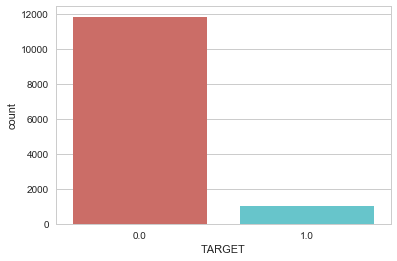

In [225]:
sns.countplot(x = 'TARGET', data = train, palette = 'hls' )
plt.show()

In [ ]:
data = train.join(n_features, how = 'inner') # Join to main data fraim

In [234]:
data.columns 

Index(['TARGET', '1F1', '1F2', '1F3', '1F4', '1F5', '1F6', '1F7', '1F8', '1F9',
       ...
       '6F38', '6F39', '6F40', '6F41', '6F42', '6F43', '6F44', '6F45', '6F46',
       '6F47'],
      dtype='object', length=259)

# Logistic Regression

In [298]:
# To avoid data imbalance in the classifier, use the sampling point "SMOTE"
X = data.loc[:, data.columns != 'TARGET']
y = data.loc[:, data.columns == 'TARGET']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns

In [299]:
len(X_train)

10312

In [300]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train['TARGET'])

In [301]:
len(os_data_y)

18926

In [302]:
len(os_data_X)

18926

In [ ]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TARGET'])

In [304]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
data_final_vars=data.columns.values.tolist()
y=['TARGET']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
# With the help of the logistic classifier, I leave only those factors that do not depend on each other.

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\bas

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\bas

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\bas

[ True False  True  True  True False False  True False False False  True
  True  True False False False False  True  True False False False  True
  True  True  True  True False False False False  True  True False False
 False  True  True  True  True  True False  True  True False False False
 False False  True False False False False False False  True False False
  True  True  True False False False False  True  True False  True False
 False  True False  True  True  True  True  True  True  True  True  True
  True False False False  True  True False False False False False False
 False False False  True  True  True False  True  True  True False False
 False  True  True  True  True False  True  True  True  True False  True
  True False  True  True  True  True  True  True False False False  True
 False False False False  True False False False False False False  True
  True  True False  True  True False False False  True  True False  True
  True False  True False False  True False  True  T

In [307]:
#Leaving in the array the most independent variables calculated in the previous block
cols = []
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        cols.append(os_data_X.columns.values[i])

In [306]:
len(rfe.support_) # 258 features, 43 per month

258

In [308]:
cols # the most independent variables

['1F1',
 '1F3',
 '1F4',
 '1F5',
 '1F8',
 '1F12',
 '1F13',
 '1F14',
 '1F19',
 '1F20',
 '1F26',
 '1F27',
 '1F28',
 '1F29',
 '1F30',
 '1F37',
 '1F38',
 '1F42',
 '1F43',
 '1F44',
 '1F45',
 '1F46',
 '2F1',
 '2F2',
 '2F8',
 '2F15',
 '2F18',
 '2F19',
 '2F20',
 '2F27',
 '2F28',
 '2F30',
 '2F35',
 '2F37',
 '2F38',
 '2F39',
 '2F40',
 '2F41',
 '2F42',
 '2F43',
 '2F44',
 '2F45',
 '2F46',
 '3F3',
 '3F4',
 '3F14',
 '3F15',
 '3F16',
 '3F18',
 '3F19',
 '3F20',
 '3F26',
 '3F27',
 '3F28',
 '3F29',
 '3F31',
 '3F32',
 '3F35',
 '3F36',
 '3F38',
 '3F39',
 '3F41',
 '3F42',
 '3F43',
 '3F44',
 '3F45',
 '3F46',
 '4F3',
 '4F8',
 '4F15',
 '4F16',
 '4F17',
 '4F19',
 '4F20',
 '4F26',
 '4F27',
 '4F29',
 '4F30',
 '4F32',
 '4F37',
 '4F39',
 '4F40',
 '4F41',
 '4F43',
 '4F44',
 '4F45',
 '4F46',
 '5F3',
 '5F4',
 '5F8',
 '5F12',
 '5F13',
 '5F17',
 '5F18',
 '5F19',
 '5F20',
 '5F26',
 '5F27',
 '5F28',
 '5F29',
 '5F30',
 '5F32',
 '5F38',
 '5F40',
 '5F42',
 '5F43',
 '5F44',
 '5F46',
 '6F2',
 '6F8',
 '6F11',
 '6F16',
 '6F17',


In [309]:
X=os_data_X[cols]
y=os_data_y['TARGET']

In [310]:
# The first model of logistic regression, remove variables with a P-value > 5%
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.556239
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.198     
Dependent Variable: TARGET           AIC:              21312.7535
Date:               2018-11-11 19:44 BIC:              22325.1832
No. Observations:   18926            Log-Likelihood:   -10527.   
Df Model:           128              LL-Null:          -13119.   
Df Residuals:       18797            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
1F1       -0.0288     0.0115   -2.4991   0.0125   -0.0514   -0.0062
1F3       -0.0089     0.0039   -2.2747   0.0229   -0.0165 

In [313]:
cols = ['1F1',
 '1F4',
 '1F5',
 '1F8',
 '1F12',
 '1F13',
 '1F14',
 '1F19',
 '1F20',
 '1F26',
 '1F28',
 '1F30',
 '1F38',
 '1F42',
 '1F43',
 '1F44',
 '1F45',
 '1F46',
 '2F2',
 '2F8',
 '2F15',
 '2F18',
 '2F27',
 '2F28',
 '2F30',
 '2F35',
 '2F37',
 '2F39',
 '2F40',
 '2F42',
 '2F43',
 '2F44',
 '2F45',
 '2F46',
 '3F3',
 '3F4',
 '3F14',
 '3F15',
 '3F18',
 '3F20',
 '3F26',
 '3F27',
 '3F28',
 '3F29',
 '3F31',
 '3F32',
 '3F35',
 '3F36',
 '3F38',
 '3F39',
 '3F42',
 '4F8',
 '4F15',
 '4F16',
 '4F19',
 '4F20',
 '4F29',
 '4F30',
 '4F37',
 '4F39',
 '4F40',
 '4F41',
 '4F46',
 '5F3',
 '5F4',
 '5F8',
 '5F12',
 '5F13',
 '5F18',
 '5F20',
 '5F27',
 '5F28',
 '5F29',
 '5F30',
 '5F32',
 '5F38',
 '5F40',
 '5F44',
 '6F2',
 '6F8',
 '6F16',
 '6F18',
 '6F20',
 '6F27',
 '6F28',
 '6F30',
 '6F32',
 '6F35',
 '6F41',
 '6F42']
X=os_data_X[cols]
y=os_data_y['TARGET']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.558092
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.195     
Dependent Variable: TARGET           AIC:              21304.8935
Date:               2018-11-11 20:00 BIC:              22011.2397
No. Observations:   18926            Log-Likelihood:   -10562.   
Df Model:           89               LL-Null:          -13119.   
Df Residuals:       18836            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
1F1       -0.0183     0.0028   -6.6531   0.0000   -0.0237   -0.0129
1F4       -0.0110     0.0032   -3.3829   0.0007   -0.0173 


All variables passed the test of significance. <br>
We can build a model

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Now we build logistic regression on the cleared data.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [315]:
# Calculate the accuracy of the forecast
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [316]:
# The first subarray has correctly guessed values, the second is - incorrectly
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1269  587]
 [ 512 1418]]


In [317]:
# Classifier Report "Logistic Regression"
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.68      0.70      1856
         1.0       0.71      0.73      0.72      1930

   micro avg       0.71      0.71      0.71      3786
   macro avg       0.71      0.71      0.71      3786
weighted avg       0.71      0.71      0.71      3786



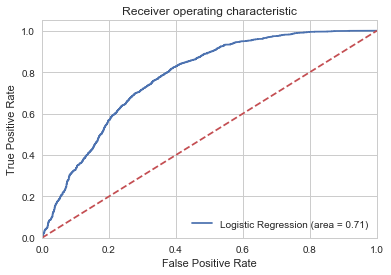

In [318]:
# Build the ROC curve. The more the blue line deviates from the red - the better the classifier works
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [332]:
# I do cross-check to check the model to avoid overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5)
scores

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.71896461, 0.68489171, 0.71870048, 0.72489429, 0.71696617])

# Random Forest Classication

In [319]:
# I will try to solve this problem by the method of a "Random Forest" on already prepared data.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1, random_state=0)

In [320]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [321]:
clf.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [322]:
# Forecast accuracy
print('Accuracy of random forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of random forest classifier on test set: 0.94


In [323]:
# "Importance" of each variable for the classifier
list(zip(X_train, clf.feature_importances_))

[('1F1', 0.012530103470673815),
 ('1F4', 0.005064021294818287),
 ('1F5', 0.0006442677326965004),
 ('1F8', 0.004517423761484501),
 ('1F12', 0.00725370692670758),
 ('1F13', 0.00578900098207578),
 ('1F14', 0.005341859349187007),
 ('1F19', 0.005928893566260328),
 ('1F20', 0.006777594083919572),
 ('1F26', 0.03637988013375297),
 ('1F28', 0.014140463473449615),
 ('1F30', 0.0023503086760447087),
 ('1F38', 0.009410011618039749),
 ('1F42', 0.010773822685532577),
 ('1F43', 0.02027731213847609),
 ('1F44', 0.01966587098683355),
 ('1F45', 0.0019424328466049704),
 ('1F46', 0.024276473194519258),
 ('2F2', 0.019444413177188456),
 ('2F8', 0.0057907837614876905),
 ('2F15', 0.005784830566787502),
 ('2F18', 0.007528870195264059),
 ('2F27', 0.018720104856700975),
 ('2F28', 0.010234674321143415),
 ('2F30', 0.002020890838389028),
 ('2F35', 0.013403753715757038),
 ('2F37', 0.03806631110191152),
 ('2F39', 0.00950420927555758),
 ('2F40', 0.021615609606759466),
 ('2F42', 0.011071644940469094),
 ('2F43', 0.0311530

In [326]:
# Confusion matrix
pd.crosstab( np.array(y_test), clf.predict(X_test), rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0.0,1.0
Actual Species,,
0.0,1788,68
1.0,169,1761


In [327]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1856
         1.0       0.96      0.91      0.94      1930

   micro avg       0.94      0.94      0.94      3786
   macro avg       0.94      0.94      0.94      3786
weighted avg       0.94      0.94      0.94      3786



In [329]:
# Calculate the accuracy of the forecast by ROC
roc_auc_score(y_test, clf.predict(X_test))

0.9378986510630695

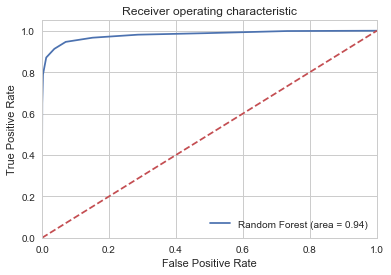

In [331]:
# Building ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Построим кривую проверки классификатора для Леса
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CLF_ROC')
plt.show()

In [338]:
X1 = data.loc[:, data.columns != 'TARGET']
X1 = X1[cols]
y1= data.loc[:, data.columns == 'TARGET']

In [339]:
clf.fit(X1, y1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [340]:
# I perform a cross-validation once again, already on complete data, judging by all the "Random Forest" for this task gives a
# more accurate result
cross_val_score(clf, X1, y1, cv=5)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

array([0.9177976 , 0.91934858, 0.91815361, 0.91812185, 0.91734575])

In [346]:
test.set_index(['ID'],inplace = True)

In [347]:
data_test = test.join(n_features, how = 'inner')

In [349]:
X_test = data_test[cols]
X_test

,1F1,1F4,1F5,1F8,1F12,1F13,1F14,1F19,1F20,1F26,1F28,1F30,1F38,1F42,1F43,1F44,1F45,1F46,2F2,2F8,2F15,2F18,2F27,2F28,2F30,...,5F8,5F12,5F13,5F18,5F20,5F27,5F28,5F29,5F30,5F32,5F38,5F40,5F44,6F2,6F8,6F16,6F18,6F20,6F27,6F28,6F30,6F32,6F35,6F41,6F42
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9.0,0.0,0.0,18.850,134.0,96.0,36.0,2.0,41.800,0.0,19.0,0.0,148.00,4.0,2.00,0.0,0.00,2.0,141.0,33.920,105.0,20.00,2.0,25.0,0.0,...,3.25,48.0,9.0,0.00,7.51,26.0,31.0,31.0,0.0,5.0,81.0,2.000000,1.0,137.0,33.450,57.0,0.00,40.30,2.0,12.0,0.0,6.0,99.000000,2.000000,2.000000
3,5.0,3.0,0.0,3.780,149.0,145.0,4.0,0.0,36.500,0.0,18.0,0.0,50.00,0.0,0.00,1.0,0.00,4.0,39.0,0.000,126.0,15.00,11.0,21.0,0.0,...,0.00,135.0,133.0,12.00,14.13,15.0,17.0,24.0,0.0,5.0,45.0,0.000000,1.0,35.0,8.050,122.0,0.00,17.00,14.0,17.0,0.0,1.0,137.000000,0.000000,0.000000
6,10.0,0.0,0.0,0.000,132.0,131.0,0.0,0.0,30.000,0.0,21.0,0.0,29.00,4.0,1.00,0.0,0.00,1.0,117.0,0.000,82.0,30.00,24.0,27.0,0.0,...,0.00,187.0,186.0,30.00,34.00,0.0,29.0,29.0,0.0,5.0,14.0,0.000000,0.0,113.0,0.046,68.0,30.00,30.50,6.0,30.0,0.0,6.0,84.000000,3.000000,5.000000
7,13.0,0.0,0.0,0.000,4.0,0.0,0.0,0.0,0.000,0.0,31.0,0.0,47.00,1.0,0.00,0.0,0.00,1.0,138.0,0.000,5.0,0.00,31.0,31.0,0.0,...,0.52,16.0,11.0,0.00,0.00,30.0,30.0,30.0,0.0,5.0,59.0,0.000000,0.0,134.0,1.400,57.0,0.00,0.00,26.0,28.0,0.0,6.0,60.000000,0.000000,3.000000
12,8.0,0.0,1.0,3.670,60.0,12.0,4.0,0.0,234.100,0.0,0.0,8.0,19.00,2.0,1.00,0.0,0.00,1.0,13.0,5.880,267.0,0.00,0.0,0.0,24.0,...,0.00,0.0,0.0,0.00,0.00,0.0,30.0,30.0,0.0,5.0,18.8,1.200000,0.0,9.0,2.880,165.0,0.00,258.00,1.0,5.0,3.0,6.0,216.250000,2.000000,3.000000
18,10.0,0.0,0.0,15.820,245.0,217.0,17.0,0.0,58.390,0.0,8.0,0.0,57.00,4.0,1.00,0.0,0.00,1.0,82.0,17.168,262.0,44.55,4.0,7.0,0.0,...,2.02,146.0,133.0,51.15,54.37,0.0,0.0,0.0,31.0,5.0,7.0,2.000000,0.0,82.0,6.800,61.0,28.05,57.67,0.0,13.0,4.0,6.0,302.000000,2.200000,2.800000
37,4.0,3.0,0.0,0.920,173.0,171.0,1.0,0.0,56.500,0.0,11.0,0.0,44.00,0.0,1.00,1.0,0.00,1.0,67.0,1.670,88.0,35.00,2.0,2.0,0.0,...,2.87,250.0,241.0,0.00,81.79,1.0,5.0,6.0,0.0,1.0,60.0,0.000000,1.0,64.0,3.550,93.0,0.00,88.40,2.0,4.0,0.0,6.0,104.000000,0.000000,2.000000
45,10.0,23.0,0.0,32.420,361.0,350.0,11.0,0.0,70.000,0.0,28.0,0.0,70.00,5.0,0.00,1.0,0.00,1.0,44.0,44.950,146.0,70.00,18.0,31.0,0.0,...,28.75,277.0,263.0,70.00,70.00,0.0,31.0,31.0,0.0,5.0,59.0,4.000000,1.0,44.0,18.400,162.0,70.00,72.00,2.0,30.0,0.0,2.0,181.000000,3.000000,3.600000
48,20.0,0.0,0.0,4.780,132.0,145.0,4.0,0.0,21.500,0.0,0.0,0.0,49.00,2.0,1.00,0.0,0.00,1.0,135.0,2.530,95.0,25.00,0.0,0.0,0.0,...,7.03,180.0,173.0,20.00,27.53,6.0,6.0,0.0,0.0,5.0,29.0,0.000000,0.0,131.0,2.400,62.0,20.00,20.00,0.0,0.0,0.0,6.0,71.000000,2.000000,2.000000


In [358]:
# On the built model, we do the prediction of probability and save it to a text file.
clf.predict_proba(X_test)[:,1].astype(float)

array([0. , 0. , 0.1, ..., 0.1, 0. , 0.1])

In [357]:
test['TARGET'] = clf.predict_proba(X_test)[:,1]
test

,TARGET
ID,
1,0.0
3,0.0
6,0.1
7,0.0
12,0.2
18,0.0
37,0.0
45,0.2
48,0.0


In [359]:
test.to_csv('AdanikovAlexandr_test.txt')